In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [202]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [203]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [205]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [206]:
train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [207]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [208]:
gender = train['gender'].value_counts()
gender

F    17697
M     8760
Name: gender, dtype: int64

In [209]:
gender_credit = train[['gender', 'credit']].groupby('gender')

In [210]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [211]:
train['male'] = 0
train['female'] = 0

test['male'] = 0
test['female'] = 0

for idx, data in enumerate(train['gender']) :
    if data == "F" :
        train['female'][idx] = 1
        test['female'][idx] = 1
    else :
        train['male'][idx] = 1
        test['male'][idx] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/l

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,male,female
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,...,1,0,0,0,NaN,2.0,-6.0,1.0,0,1
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,...,1,0,0,1,Laborers,3.0,-5.0,1.0,0,1
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,...,1,0,1,0,Managers,2.0,-22.0,2.0,1,0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,0,1
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,...,1,0,0,0,Managers,2.0,-26.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,...,1,0,0,0,Core staff,4.0,-2.0,1.0,0,1
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,...,1,0,0,0,NaN,2.0,-47.0,2.0,0,1
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,...,1,0,0,0,Core staff,2.0,-25.0,2.0,0,1
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,...,1,0,0,0,Laborers,1.0,-59.0,2.0,1,0


In [212]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,male,female
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0,0,1
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0,0,1
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0,1,0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0,0,1
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,0,1
9996,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,1,0
9997,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,1,0
9998,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,0,1


In [213]:
train = train.drop('gender', axis=1)
test = test.drop('gender', axis=1)

In [214]:
car = train['car'].value_counts()

In [215]:
car

N    16410
Y    10047
Name: car, dtype: int64

In [216]:
car_credit = train[['car', 'credit']].groupby('car')
car_credit.mean()

,credit
car,
N,1.515296
Y,1.526525


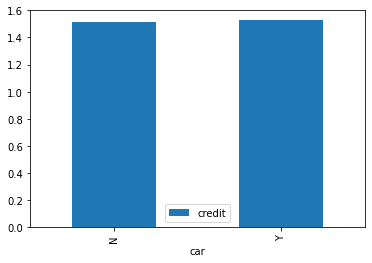

In [217]:
car_credit.mean().plot.bar()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


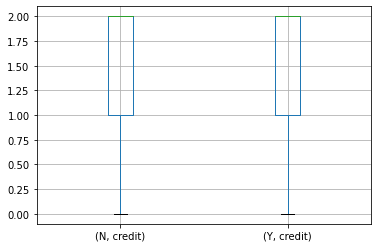

In [218]:
car_credit.boxplot('credit')

In [219]:
train['car_y'] = 0
train['car_n'] = 0

test['car_y'] = 0
test['car_n'] = 0

for idx, data in enumerate(train['car']) :
    if data == "Y" :
        train['car_y'][idx] = 1
        test['car_y'][idx] = 1
    else :
        train['car_n'][idx] = 1
        test['car_n'][idx] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipy

,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,...,phone,email,occyp_type,family_size,begin_month,credit,male,female,car_y,car_n
0,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,...,0,0,NaN,2.0,-6.0,1.0,0,1,0,1
1,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,...,0,1,Laborers,3.0,-5.0,1.0,0,1,0,1
2,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,...,1,0,Managers,2.0,-22.0,2.0,1,0,1,0
3,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,...,1,0,Sales staff,2.0,-37.0,0.0,0,1,0,1
4,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,...,0,0,Managers,2.0,-26.0,2.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,...,0,0,Core staff,4.0,-2.0,1.0,0,1,0,1
26453,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,...,0,0,NaN,2.0,-47.0,2.0,0,1,0,1
26454,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,...,0,0,Core staff,2.0,-25.0,2.0,0,1,1,0
26455,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,...,0,0,Laborers,1.0,-59.0,2.0,1,0,0,1


In [220]:
train = train.drop('car', axis=1)
test = test.drop('car', axis=1)

In [221]:
reality = train['reality'].value_counts()

In [222]:
reality

Y    17830
N     8627
Name: reality, dtype: int64

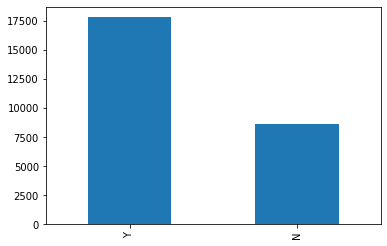

In [223]:
reality.plot.bar()

In [224]:
train['reality_y'] = 0
train['reality_n'] = 0

test['reality_y'] = 0
test['reality_n'] = 0

for idx, data in enumerate(train['reality']) :
    if data == "Y" :
        train['reality_y'][idx] = 1
        test['reality_y'][idx] = 1
    else :
        train['reality_n'][idx] = 1
        test['reality_n'][idx] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipy

,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,occyp_type,family_size,begin_month,credit,male,female,car_y,car_n,reality_y,reality_n
0,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,...,NaN,2.0,-6.0,1.0,0,1,0,1,0,1
1,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,...,Laborers,3.0,-5.0,1.0,0,1,0,1,1,0
2,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,...,Managers,2.0,-22.0,2.0,1,0,1,0,1,0
3,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,...,Sales staff,2.0,-37.0,0.0,0,1,0,1,1,0
4,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,...,Managers,2.0,-26.0,2.0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,...,Core staff,4.0,-2.0,1.0,0,1,0,1,0,1
26453,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,...,NaN,2.0,-47.0,2.0,0,1,0,1,1,0
26454,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,...,Core staff,2.0,-25.0,2.0,0,1,1,0,0,1
26455,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,...,Laborers,1.0,-59.0,2.0,1,0,0,1,1,0


In [225]:
train = train.drop('reality', axis=1)
test = test.drop('reality', axis=1)

In [226]:
train['child_num'].describe()

count    26457.000000
mean         0.428658
std          0.747326
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: child_num, dtype: float64

In [227]:
child_num = train['child_num'].value_counts()

In [228]:
child_num_credit = train[['child_num', 'credit']].groupby('credit')

In [229]:
child_num_credit = train[['child_num', 'credit']].groupby('child_num')

In [230]:
train[train['child_num']>5]

,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,occyp_type,family_size,begin_month,credit,male,female,car_y,car_n,reality_y,reality_n
8462,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,...,Drivers,15.0,-7.0,2.0,1,0,1,0,1,0
9021,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,...,Drivers,15.0,-58.0,2.0,1,0,1,0,1,0
10731,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,...,Waiters/barmen staff,20.0,-5.0,2.0,0,1,0,1,1,0
25313,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,...,Cleaning staff,9.0,-26.0,2.0,0,1,0,1,0,1
25390,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,...,Drivers,15.0,-43.0,2.0,1,0,1,0,1,0
25638,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,...,Cleaning staff,9.0,-31.0,2.0,0,1,0,1,0,1


In [231]:
test['child_num'].value_counts()

0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [232]:
idx = train[train['child_num']>5].index
train = train.drop(idx, axis=0)

In [233]:
train['income_total'].describe()

count    2.645100e+04
mean     1.873073e+05
std      1.018878e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f60d5728250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f60d57aca50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f60d5b089d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f60d57acf10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f60d57289d0>,
  <matplotlib.lines.Line2D at 0x7f60d59c57d0>]}

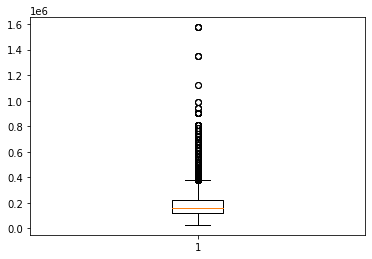

In [234]:
plt.boxplot(train['income_total'])

In [235]:
train_income_log = train
train_income_log['income_total'] = np.log1p(train['income_total'])

(array([  84.,  341., 2788., 7264., 7714., 5502., 2362.,  308.,   77.,
          11.]),
 array([10.20362918, 10.61024291, 11.01685664, 11.42347037, 11.83008409,
        12.23669782, 12.64331155, 13.04992528, 13.45653901, 13.86315274,
        14.26976647]),
 <a list of 10 Patch objects>)

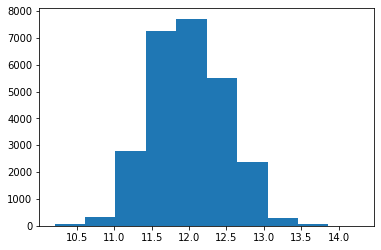

In [236]:
plt.hist(train_income_log['income_total'])

In [237]:
train['income_total']

0        12.218500
1        12.419170
2        13.017005
3        12.218500
4        11.967187
           ...    
26452    12.323860
26453    12.100718
26454    12.586223
26455    12.049425
26456    11.302217
Name: income_total, Length: 26451, dtype: float64

In [238]:
test['income_total'] = np.log1p(test['income_total'])

In [239]:
test['income_total']

0       11.630717
1       11.813037
2       11.147253
3       11.630717
4       12.323860
          ...    
9995    12.218500
9996    12.218500
9997    12.586223
9998    12.100718
9999    12.506181
Name: income_total, Length: 10000, dtype: float64

In [240]:
income_type = train['income_type'].value_counts()

In [241]:
income_type

Working                 13639
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [242]:
train['Commercial associate'] = 0
train['Pensioner'] = 0
train['State servant'] = 0
train['Student'] = 0
train['Working'] = 0

test['Commercial associate'] = 0
test['Pensioner'] = 0
test['State servant'] = 0
test['Student'] = 0
test['Working'] = 0

for idx, data in enumerate(train['income_type']) :
    if data == 'Commercial associate' :
        train['Commercial associate'][idx] = 1
        test['Commercial associate'][idx] = 1
    elif data == 'Pensioner' :
        train['Pensioner'][idx] = 1
        test['Pensioner'][idx] = 1
    elif data == 'State servant' :
        train['State servant'][idx] = 1
        test['State servant'][idx] = 1
    elif data == 'Student' :
        train['Student'][idx] = 1
        test['Student'][idx] = 1
    else :
        train['Working'][idx] = 1
        test['Working'][idx] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipyk

,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,female,car_y,car_n,reality_y,reality_n,Commercial associate,Pensioner,State servant,Student,Working
0,0,12.218500,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,...,1,0,1,0,1,1,0,0,0,0
1,1,12.419170,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,...,1,0,1,1,0,1,0,0,0,0
2,0,13.017005,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,12.218500,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,...,1,0,1,1,0,1,0,0,0,0
4,0,11.967187,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,12.323860,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,...,1,0,1,0,1,0,0,0,0,0
26453,1,12.100718,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,...,1,0,1,1,0,0,0,0,0,0
26454,0,12.586223,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,...,1,1,0,0,1,0,0,0,0,0
26455,0,12.049425,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,...,0,0,1,1,0,0,0,0,0,0


In [243]:
train = train.drop('income_type', axis=1)
test = test.drop('income_type', axis=1)

In [244]:
edu_type = train['edu_type'].value_counts()

In [245]:
edu_type

Secondary / secondary special    17989
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [246]:
edu_type_credit = train[['edu_type', 'credit']].groupby('edu_type')

In [247]:
train['Secondary / secondary special'] = 0
train['Higher education'] = 0
train['Incomplete higher'] = 0
train['Lower secondary'] = 0
train['Secondary / secondary special'] = 0

test['Secondary / secondary special'] = 0
test['Higher education'] = 0
test['Incomplete higher'] = 0
test['Lower secondary'] = 0
test['Secondary / secondary special'] = 0

for idx, data in enumerate(train['edu_type']) :
    if data == 'Secondary / secondary special' :
        train['Secondary / secondary special'][idx] = 1
        test['Secondary / secondary special'][idx] = 1
    elif data == 'Higher education' :
        train['Higher education'][idx] = 1
        test['Higher education'][idx] = 1
    elif data == 'Incomplete higher' :
        train['Incomplete higher'][idx] = 1
        test['Incomplete higher'][idx] = 1
    elif data == 'Lower secondary' :
        train['Lower secondary'][idx] = 1
        test['Lower secondary'][idx] = 1
    else :
        train['Secondary / secondary special'][idx] = 1
        test['Secondary / secondary special'][idx] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: Settin

,child_num,income_total,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,reality_n,Commercial associate,Pensioner,State servant,Student,Working,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary
0,0,12.218500,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,...,1,1,0,0,0,0,0,1,0,0
1,1,12.419170,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,13.017005,Higher education,Married,House / apartment,-19087,-4434,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,12.218500,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,11.967187,Higher education,Married,House / apartment,-15037,-2105,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,12.323860,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,...,1,0,0,0,0,0,0,0,0,0
26453,1,12.100718,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26454,0,12.586223,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,...,1,0,0,0,0,0,0,0,0,0
26455,0,12.049425,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
train = train.drop('edu_type', axis=1)
test = test.drop('edu_type', axis=1)

In [249]:
house_type = train['house_type'].value_counts()

In [250]:
house_type

House / apartment      23647
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [251]:
house_type_credit = train[['house_type', 'credit']].groupby('house_type')

In [252]:
house_type_credit.mean()

,credit
house_type,
Co-op apartment,1.472727
House / apartment,1.521504
Municipal apartment,1.535452
Office apartment,1.494737
Rented apartment,1.424242
With parents,1.510740


In [253]:
train['Co-op apartment'] = 0
train['House / apartment'] = 0
train['Municipal apartment'] = 0
train['Office apartment'] = 0
train['Rented apartment'] = 0
train['With parents'] = 0

test['Co-op apartment'] = 0
test['House / apartment'] = 0
test['Municipal apartment'] = 0
test['Office apartment'] = 0
test['Rented apartment'] = 0
test['With parents'] = 0

for idx, data in enumerate(train['house_type']) :
    if data == 'Co-op apartment' :
        train['Co-op apartment'][idx] = 1
        test['Co-op apartment'][idx] = 1
    elif data == 'House / apartment' :
        train['House / apartment'][idx] = 1
        test['House / apartment'][idx] = 1
    elif data == 'Municipal apartment' :
        train['Municipal apartment'][idx] = 1
        test['Municipal apartment'][idx] = 1
    elif data == 'Office apartment' :
        train['Office apartment'][idx] = 1
        test['Office apartment'][idx] = 1
    elif data == 'Rented apartment' :
        train['Rented apartment'][idx] = 1
        test['Rented apartment'][idx] = 1
    elif data == 'With parents' :
        train['With parents'] = 1
        test['With parents'] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to b

,child_num,income_total,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,...,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,12.218500,Married,Municipal apartment,-13899,-4709,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,12.419170,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,13.017005,Married,House / apartment,-19087,-4434,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,12.218500,Married,House / apartment,-15088,-2092,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4,0,11.967187,Married,House / apartment,-15037,-2105,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,12.323860,Married,House / apartment,-12079,-1984,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26453,1,12.100718,Separated,House / apartment,-15291,-2475,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26454,0,12.586223,Civil marriage,With parents,-10082,-2015,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26455,0,12.049425,Single / not married,House / apartment,-10145,-107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [254]:
train = train.drop('house_type', axis=1)
test = test.drop('house_type', axis=1)

In [255]:
train['DAYS_BIRTH'] = -train['DAYS_BIRTH']

In [256]:
train['DAYS_BIRTH'].describe()

count    26451.000000
mean     15958.196628
std       4201.873090
min       7705.000000
25%      12446.000000
50%      15547.000000
75%      19431.000000
max      25152.000000
Name: DAYS_BIRTH, dtype: float64

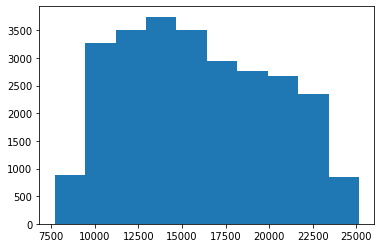

In [257]:
plt.hist(train['DAYS_BIRTH'])
plt.show()

In [258]:
log = np.log1p(train['DAYS_BIRTH'])

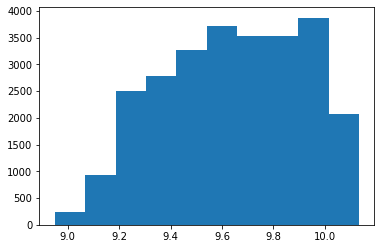

In [259]:
plt.hist(log)
plt.show()

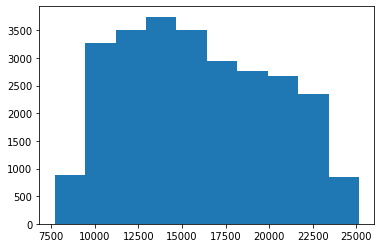

In [260]:
plt.hist(train['DAYS_BIRTH'])
plt.show()

In [261]:
age_credit = train[['DAYS_BIRTH', 'credit']].groupby('credit')

In [262]:
age_credit.mean()

,DAYS_BIRTH
credit,
0.0,15870.497827
1.0,15734.349130
2.0,16057.560960


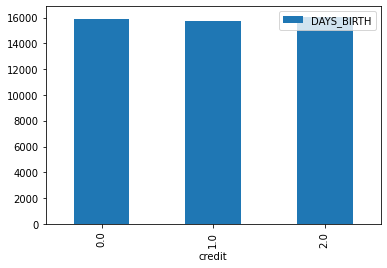

In [263]:
age_credit.mean().plot.bar()

In [264]:
train['DAYS_BIRTH'] = log

In [265]:
age_credit = train[['DAYS_BIRTH', 'credit']].groupby('credit')

In [266]:
test['DAYS_BIRTH'] = np.log1p(-test['DAYS_BIRTH'])

In [267]:
train

,child_num,income_total,family_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,...,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,12.218500,Married,9.539644,-4709,1,0,0,0,NaN,...,0,1,0,0,0,0,1,0,0,1
1,1,12.419170,Civil marriage,9.339701,-1540,1,0,0,1,Laborers,...,1,0,0,0,0,1,0,0,0,1
2,0,13.017005,Married,9.856815,-4434,1,0,1,0,Managers,...,0,1,0,0,0,1,0,0,0,1
3,0,12.218500,Married,9.621721,-2092,1,0,1,0,Sales staff,...,1,0,0,0,0,1,0,0,0,1
4,0,11.967187,Married,9.618336,-2105,1,0,0,0,Managers,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,12.323860,Married,9.399306,-1984,1,0,0,0,Core staff,...,0,0,0,0,0,0,0,0,0,1
26453,1,12.100718,Separated,9.635085,-2475,1,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
26454,0,12.586223,Civil marriage,9.218606,-2015,1,0,0,0,Core staff,...,0,0,0,0,0,0,0,0,0,1
26455,0,12.049425,Single / not married,9.224835,-107,1,0,0,0,Laborers,...,0,0,0,0,0,0,0,0,0,1


In [268]:
train['DAYS_EMPLOYED'].describe()

count     26451.000000
mean      59082.535859
std      137487.971901
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -407.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [269]:
train[train['DAYS_EMPLOYED'] > 0]

,child_num,income_total,family_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,...,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
14,0,11.967187,Single / not married,10.039896,365243,1,0,1,0,NaN,...,1,0,0,0,0,1,0,0,0,1
18,0,12.283038,Married,10.048194,365243,1,0,0,0,NaN,...,1,0,0,0,0,1,0,0,0,1
21,0,11.967187,Married,9.964300,365243,1,0,1,0,NaN,...,1,0,0,0,0,1,0,0,0,1
24,0,12.218500,Single / not married,10.015118,365243,1,0,1,0,NaN,...,1,0,0,0,0,1,0,0,0,1
46,0,11.813037,Widow,9.957076,365243,1,0,1,0,NaN,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,0,12.323860,Widow,9.959490,365243,1,0,0,1,NaN,...,1,0,0,0,0,1,0,0,0,1
26432,0,11.184435,Married,10.013014,365243,1,0,1,0,NaN,...,1,0,0,0,0,1,0,0,0,1
26439,0,11.119898,Married,9.864695,365243,1,0,0,0,NaN,...,0,0,1,0,0,1,0,0,0,1
26441,0,11.407576,Separated,10.091211,365243,1,0,0,0,NaN,...,1,0,0,0,0,1,0,0,0,1


In [270]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']

In [271]:
train[train['DAYS_EMPLOYED'] < 0] = 0

In [272]:
train['DAYS_EMPLOYED'].describe()

count    26451.000000
mean      2198.641942
std       2370.397357
min          0.000000
25%        407.000000
50%       1539.000000
75%       3153.000000
max      15713.000000
Name: DAYS_EMPLOYED, dtype: float64

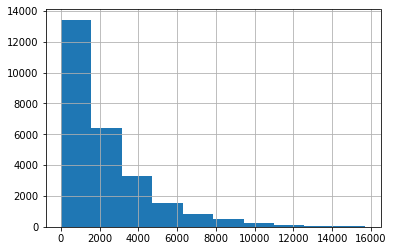

In [273]:
train['DAYS_EMPLOYED'].hist()

In [274]:
train['DAYS_EMPLOYED'] = np.log1p(train['DAYS_EMPLOYED'])

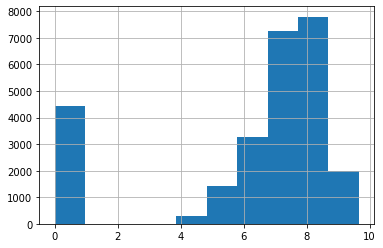

In [275]:
train['DAYS_EMPLOYED'].hist()

In [276]:
train[['DAYS_EMPLOYED', 'credit']].groupby('credit').mean()

,DAYS_EMPLOYED
credit,
0.0,2.796521
1.0,7.412618
2.0,7.479400


In [277]:
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']
test[test['DAYS_EMPLOYED'] < 0] = 0
test['DAYS_EMPLOYED'] = np.log1p(test['DAYS_EMPLOYED'])

In [278]:
train['occyp_type'].value_counts()

Laborers                 4512
0                        4438
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1572
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            401
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      123
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [279]:
train[['occyp_type', 'credit']].groupby('occyp_type').mean()

,credit
occyp_type,
0,0.000000
Accountants,1.486696
Cleaning staff,1.568579
Cooking staff,1.505470
Core staff,1.502646
Drivers,1.534351
HR staff,1.709677
High skill tech staff,1.503846
IT staff,1.365854


In [280]:
train = train.drop('occyp_type', axis=1)
test = test.drop('occyp_type', axis=1)

In [281]:
train.columns

Index(['child_num', 'income_total', 'family_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit', 'male', 'female', 'car_y',
       'car_n', 'reality_y', 'reality_n', 'Commercial associate', 'Pensioner',
       'State servant', 'Student', 'Working', 'Secondary / secondary special',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents'],
      dtype='object')

In [282]:
test.columns

Index(['child_num', 'income_total', 'family_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'male', 'female', 'car_y', 'car_n',
       'reality_y', 'reality_n', 'Commercial associate', 'Pensioner',
       'State servant', 'Student', 'Working', 'Secondary / secondary special',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents'],
      dtype='object')

In [283]:
train['family_type'].value_counts()

Married                 15391
0                        4438
Single / not married     2995
Civil marriage           1855
Separated                1274
Widow                     498
Name: family_type, dtype: int64

In [284]:
train['Married'] = 0
train['0'] = 0
train['Single / not married'] = 0
train['Civil marriage'] = 0
train['Separatedt'] = 0
train['Widow'] = 0

test['Married'] = 0
test['0'] = 0
test['Single / not married'] = 0
test['Civil marriage'] = 0
test['Separatedt'] = 0
test['Widow'] = 0

for idx, data in enumerate(train['family_type']) :
    if data == 'Married' :
        train['Married'][idx] = 1
        test['Married'][idx] = 1
    elif data == '0' :
        train['0'][idx] = 1
        test['0'][idx] = 1
    elif data == 'Single / not married' :
        train['Single / not married'][idx] = 1
        test['Single / not married'][idx] = 1
    elif data == 'Civil marriage' :
        train['Civil marriage'][idx] = 1
        test['Civil marriage'][idx] = 1
    elif data == 'Separatedt' :
        train['Separatedt'][idx] = 1
        test['Separatedt'][idx] = 1
    elif data == 'Widow' :
        train['Widow'] = 1
        test['Widow'] = 1
        
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to b

,child_num,income_total,family_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,...,Municipal apartment,Office apartment,Rented apartment,With parents,Married,0,Single / not married,Civil marriage,Separatedt,Widow
0,0,12.218500,Married,9.539644,8.457443,1,0,0,0,2.0,...,1,0,0,1,1,0,0,0,0,1
1,1,12.419170,Civil marriage,9.339701,7.340187,1,0,0,1,3.0,...,0,0,0,1,0,0,0,1,0,1
2,0,13.017005,Married,9.856815,8.397283,1,0,1,0,2.0,...,0,0,0,1,1,0,0,0,0,1
3,0,12.218500,Married,9.621721,7.646354,1,0,1,0,2.0,...,0,0,0,1,1,0,0,0,0,1
4,0,11.967187,Married,9.618336,7.652546,1,0,0,0,2.0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,12.323860,Married,9.399306,7.593374,1,0,0,0,4.0,...,0,0,0,1,0,0,0,0,0,1
26453,1,12.100718,Separated,9.635085,7.814400,1,0,0,0,2.0,...,0,0,0,1,0,0,0,0,0,1
26454,0,12.586223,Civil marriage,9.218606,7.608871,1,0,0,0,2.0,...,0,0,0,1,0,0,0,0,0,1
26455,0,12.049425,Single / not married,9.224835,4.682131,1,0,0,0,1.0,...,0,0,0,1,0,0,0,0,0,1


In [285]:
train = train.drop('family_type', axis=1)
test = test.drop('family_type', axis=1)

In [286]:
train.columns

Index(['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit', 'male', 'female', 'car_y', 'car_n',
       'reality_y', 'reality_n', 'Commercial associate', 'Pensioner',
       'State servant', 'Student', 'Working', 'Secondary / secondary special',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'Married', '0',
       'Single / not married', 'Civil marriage', 'Separatedt', 'Widow'],
      dtype='object')

In [287]:
train['family_size'].describe()

count    26451.000000
mean         1.902272
std          1.201014
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: family_size, dtype: float64

In [288]:
train['begin_month'].describe()

count    26451.000000
mean       -21.780538
std         17.961032
min        -60.000000
25%        -36.000000
50%        -19.000000
75%         -5.000000
max          0.000000
Name: begin_month, dtype: float64

In [289]:
train['begin_month'] = -train['begin_month']
test['begin_month'] = -test['begin_month']

In [290]:
y = train['credit']
X = train.drop('credit', axis=1)

In [291]:
y = y.astype('int32')

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=156)
params = {
    'max_depth' : [6, 8, 10, 12, 14, 16, 18],
    'min_samples_split' : [16, 20, 24, 28]
}

dt_grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='neg_log_loss', cv=5, verbose=1)
dt_grid_cv.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16, 18],
                         'min_samples_split': [16, 20, 24, 28]},
             scoring='neg_log_loss', verbose=1)

In [89]:
print('가장 좋은 점수 : ', dt_grid_cv.best_score_)
print('최적 파라미터 : ', dt_grid_cv.best_params_)

가장 좋은 점수 :  -0.6959771245949793
최적 파라미터 :  {'max_depth': 6, 'min_samples_split': 28}


In [90]:
pd.DataFrame(dt_grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.098984,0.078601,0.007613,0.002099,6,16,"{'max_depth': 6, 'min_samples_split': 16}",-0.721927,-0.702039,-0.696822,-0.689586,-0.690734,-0.700222,0.011740,4
1,0.101927,0.070605,0.016595,0.014495,6,20,"{'max_depth': 6, 'min_samples_split': 20}",-0.715594,-0.702039,-0.696505,-0.689586,-0.690734,-0.698892,0.009463,3
2,0.086809,0.064070,0.009187,0.007227,6,24,"{'max_depth': 6, 'min_samples_split': 24}",-0.715594,-0.702039,-0.696505,-0.682154,-0.690734,-0.697405,0.011227,2
3,0.051362,0.003494,0.005202,0.000251,6,28,"{'max_depth': 6, 'min_samples_split': 28}",-0.721739,-0.689373,-0.696505,-0.682154,-0.690115,-0.695977,0.013660,1
4,0.138867,0.082681,0.010015,0.006821,8,16,"{'max_depth': 8, 'min_samples_split': 16}",-0.781521,-0.759034,-0.729787,-0.784844,-0.738245,-0.758686,0.022176,8
5,0.063375,0.000986,0.005365,0.000328,8,20,"{'max_depth': 8, 'min_samples_split': 20}",-0.756677,-0.753000,-0.729423,-0.784844,-0.732434,-0.751276,0.019958,7
6,0.070959,0.004470,0.005510,0.000120,8,24,"{'max_depth': 8, 'min_samples_split': 24}",-0.756808,-0.745852,-0.723260,-0.777374,-0.732642,-0.747187,0.018919,6
7,0.072975,0.002032,0.005811,0.000170,8,28,"{'max_depth': 8, 'min_samples_split': 28}",-0.755710,-0.727420,-0.717340,-0.777032,-0.725635,-0.740627,0.022335,5
8,0.087460,0.001702,0.006139,0.000782,10,16,"{'max_depth': 10, 'min_samples_split': 16}",-0.938950,-0.898027,-0.885782,-0.952077,-0.899822,-0.914932,0.025770,12
9,0.085285,0.001058,0.006224,0.000383,10,20,"{'max_depth': 10, 'min_samples_split': 20}",-0.901625,-0.843494,-0.866223,-0.903529,-0.844878,-0.871950,0.026280,11


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=156, n_jobs=-1)
params = {
    'n_estimators' : [100, 200],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 16],
    'min_samples_split' : [12, 16, 20]
}

dt_grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='neg_log_loss', cv=5, n_jobs=-1)
dt_grid_cv.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=156),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [12, 16, 20],
                         'n_estimators': [100, 200]},
             scoring='neg_log_loss')

In [92]:
print('가장 좋은 점수 : ', dt_grid_cv.best_score_)
print('최적 파라미터 : ', dt_grid_cv.best_params_)

가장 좋은 점수 :  -0.664351975842572
최적 파라미터 :  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 200}


In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=1561)
params = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.01, 0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb_clf, param_grid=params, scoring='neg_log_loss', cv=5)
gb_grid_cv.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1561),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200]},
             scoring='neg_log_loss')

In [94]:
print('가장 좋은 점수 : ', gb_grid_cv.best_score_)
print('최적 파라미터 : ', gb_grid_cv.best_params_)

가장 좋은 점수 :  -0.6514086567676707
최적 파라미터 :  {'learning_rate': 0.1, 'n_estimators': 200}


In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

xb_clf = XGBClassifier(random_state=156)
params = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.01, 0.05, 0.1]
}

xb_grid_cv = GridSearchCV(xb_clf, param_grid=params, scoring='neg_log_loss', cv=5)
xb_grid_cv.fit(X, y)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=156),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200]},
             scoring='neg_log_loss')

In [96]:
print('가장 좋은 점수 : ', xb_grid_cv.best_score_)
print('최적 파라미터 : ', xb_grid_cv.best_params_)

가장 좋은 점수 :  -0.6571852936065247
최적 파라미터 :  {'learning_rate': 0.1, 'n_estimators': 200}


In [299]:

y_test = test

gb_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators= 200, random_state=156)
gb_clf.fit(X, y)
predict = gb_clf.predict_proba(y_test)

In [300]:
predict

array([[0.9967358 , 0.00212618, 0.00113803],
       [0.11950921, 0.15073662, 0.72975417],
       [0.10371852, 0.17908912, 0.71719236],
       ...,
       [0.06570468, 0.13201112, 0.8022842 ],
       [0.06843442, 0.19676797, 0.73479761],
       [0.09191164, 0.20204017, 0.70604819]])

In [301]:
i, j, k = [], [], []
for row in predict:
  i.append(row[0])
  j.append(row[1])
  k.append(row[2])

In [302]:
submit = pd.read_csv('./data/sample_submission.csv')

submit['0'] = i
submit['1'] = j
submit['2'] = k
submit.head(10)

,index,0,1,2
0,26457,0.996736,0.002126,0.001138
1,26458,0.119509,0.150737,0.729754
2,26459,0.103719,0.179089,0.717192
3,26460,0.114172,0.149185,0.736643
4,26461,0.091582,0.140257,0.768161
5,26462,0.136286,0.222305,0.641409
6,26463,0.408646,0.580042,0.011312
7,26464,0.996736,0.002126,0.001138
8,26465,0.084005,0.133650,0.782345
9,26466,0.093785,0.219795,0.686421


In [303]:

submit.to_csv("./data/submit_1.csv",index=False)